In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


In [2]:
# read in the data
df = pd.read_csv('DataFiles/SmoteImpFeat97%.csv')

# split the data into training and test sets
X = df.drop('DTP', axis=1)
y = df['DTP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
X.shape

(10752, 68)

In [4]:
# def create_MLP():
#     model = Sequential()
#     model.add(Dense(64, input_dim=68, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model


In [10]:
# from keras import regularizers
# from keras.layers import BatchNormalization

# def create_MLP():
#     model = Sequential()
#     model.add(Dense(64, input_dim=68, activation='relu',
#                     kernel_regularizer=regularizers.l2(0.001)))
#     model.add(BatchNormalization())
#     model.add(Dense(32, activation='relu',
#                     kernel_regularizer=regularizers.l2(0.001)))
#     model.add(BatchNormalization())
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

In [15]:
from keras import regularizers
from keras.layers import BatchNormalization

def create_MLP():
    model = Sequential()
    model.add(Dense(64, input_dim=68, activation='relu',
                    kernel_regularizer=regularizers.l2(0.0001)))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.0001)))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
model = create_MLP()
history = model.fit(X_train, y_train, batch_size = 32, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
269/269 [==============================] - 2s 2ms/step - loss: 0.5246 - accuracy: 0.7505 - val_loss: 0.4148 - val_accuracy: 0.8173
Epoch 2/25
269/269 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8443 - val_loss: 0.3507 - val_accuracy: 0.8554
Epoch 3/25
269/269 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8799 - val_loss: 0.3071 - val_accuracy: 0.8805
Epoch 4/25
269/269 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8927 - val_loss: 0.2731 - val_accuracy: 0.8907
Epoch 5/25
269/269 [==============================] - 0s 1ms/step - loss: 0.2538 - accuracy: 0.9078 - val_loss: 0.2433 - val_accuracy: 0.9117
Epoch 6/25
269/269 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9225 - val_loss: 0.2234 - val_accuracy: 0.9159
Epoch 7/25
269/269 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9249 - val_loss: 0.2216 - val_accuracy: 0.9191
Epoch 

In [17]:
import matplotlib.pyplot as plt 

def plot_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

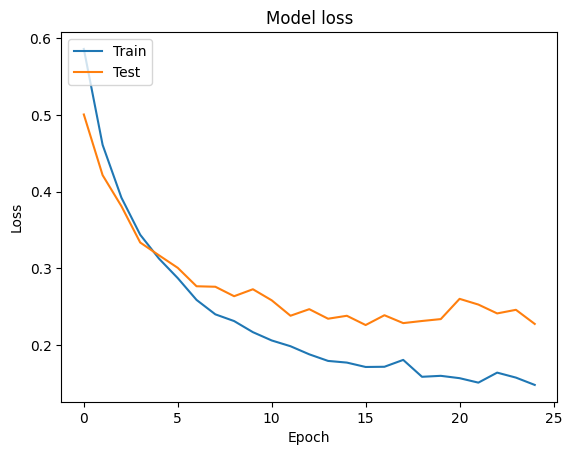

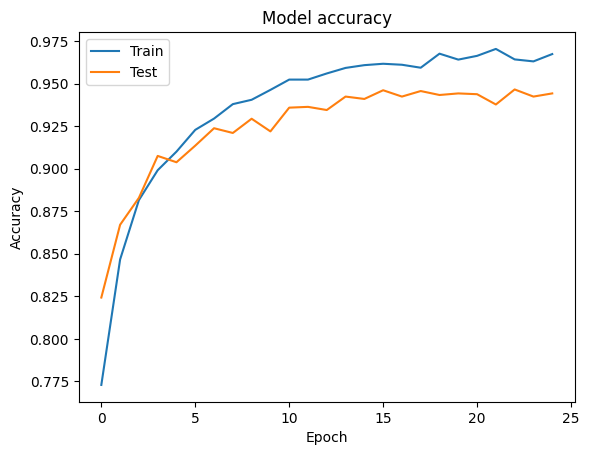

In [14]:
plot_history(history)

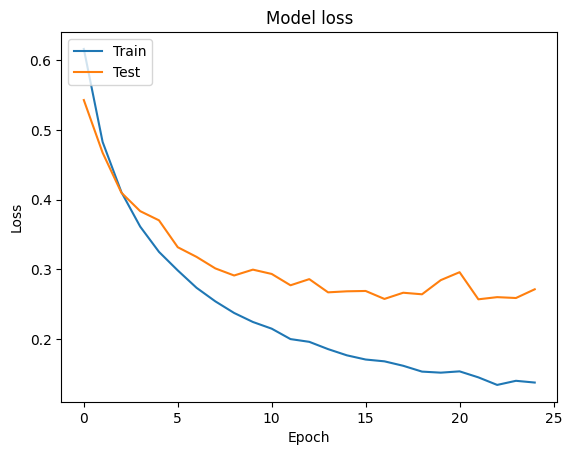

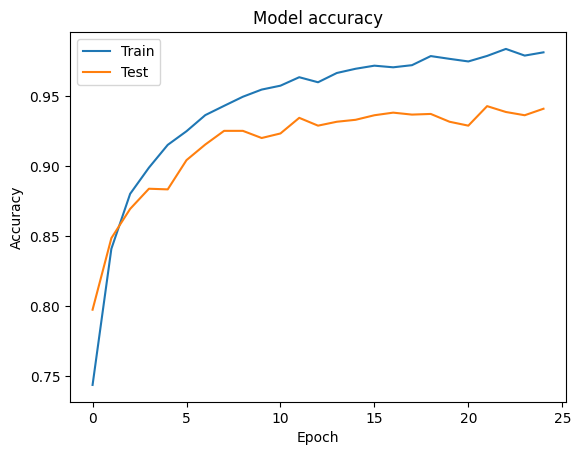

In [9]:
plot_history(history)

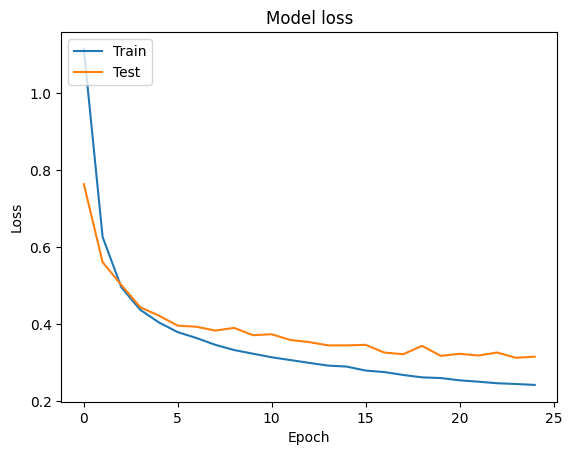

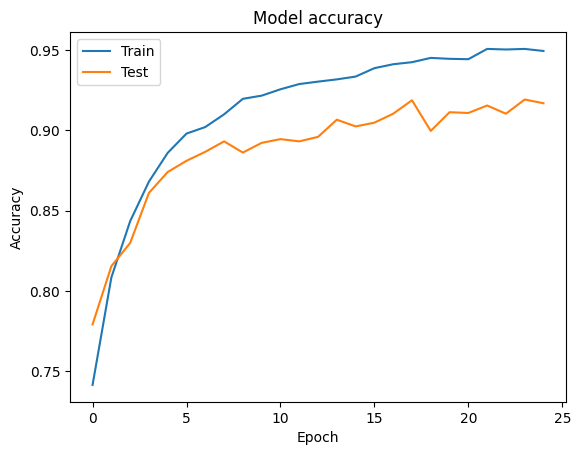

In [11]:
plot_history(history)

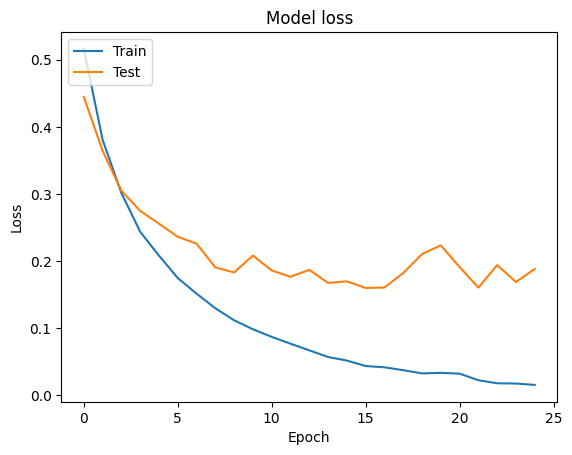

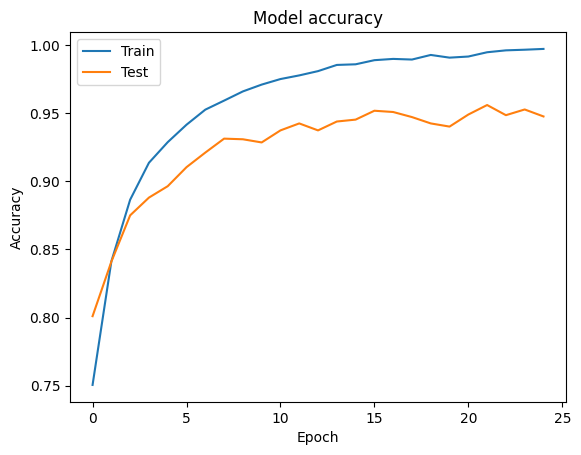

In [10]:
plot_history(history)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

68/68 [==============================] - 0s 616us/step


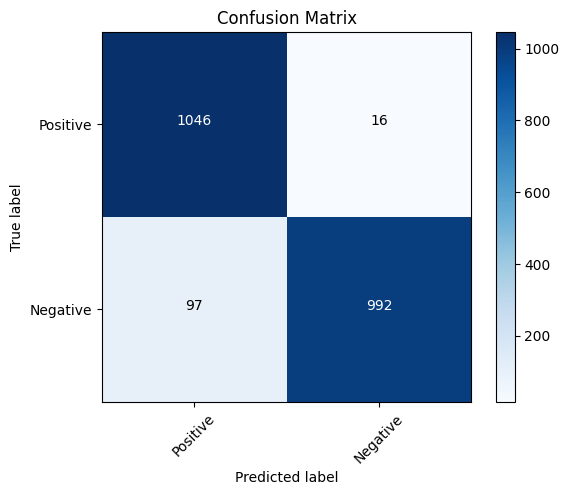

In [12]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add the labels for each quadrant
classes = ['Positive', 'Negative']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add the values for each quadrant
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()